In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [72]:
df = pd.read_json(r'../PQS/mem_kem.json')
print(df.head(5))

                                                   cpuinfo  \
x86_64   {'': {'model name': 'Intel(R) Xeon(R) Platinum...   
aarch64  {'': {'BogoMIPS': '243.75', 'Features': 'fp as...   
m1       {'': {'BogoMIPS': '48.00', 'Features': 'fp asi...   

                                                    config  \
x86_64   {'': {'Target platform': 'x86_64-Linux-4.10.0-...   
aarch64  {'': {'Target platform': 'arm64v8-Linux-5.4.0-...   
m1       {'': {'Target platform': 'aarch64-Linux-5.10.1...   

                                                   BIKE-L1  \
x86_64   {'': {'keygen': {'insts': '3476534', 'maxBytes...   
aarch64  {'': {'keygen': {'insts': '2627001', 'maxBytes...   
m1       {'': {'keygen': {'insts': '2624889', 'maxBytes...   

                                                   BIKE-L3  \
x86_64   {'': {'keygen': {'insts': '5791495', 'maxBytes...   
aarch64  {'': {'keygen': {'insts': '3745268', 'maxBytes...   
m1       {'': {'keygen': {'insts': '3747855', 'maxBytes...   

    

In [73]:
kems = ["Classic-McEliece-348864",'Classic-McEliece-348864f','Classic-McEliece-460896', 'Classic-McEliece-460896f', 'Classic-McEliece-6688128',
         'Classic-McEliece-6688128f', 'Classic-McEliece-6960119', 'Classic-McEliece-6960119f','Classic-McEliece-8192128','Classic-McEliece-8192128f',
         'Kyber512', 'Kyber512-90s', "Kyber768", 'Kyber768-90s', 'Kyber1024', 'Kyber1024-90s',
         'NTRU-HPS-2048-509','NTRU-HPS-2048-677', 'NTRU-HRSS-701', 'NTRU-HPS-4096-821', 'NTRU-HPS-4096-1229', 'NTRU-HRSS-1373',
         'LightSaber-KEM', 'Saber-KEM', 'FireSaber-KEM' ]

def extractValues(df,kem_name):
    return df[kem_name]['x86_64']['']



keygen =[ ]

encaps = []

decaps = []




for i in kems:
    mem_df = extractValues(df,i)
    keygen.append( mem_df["keygen"]['maxBytes'] )
    encaps.append( mem_df["encaps"]['maxBytes'] )
    decaps.append( mem_df["decaps"]['maxBytes'] )

df = pd.DataFrame()
df['KEM_name'] = kems
df['keygen'] = keygen
df['encaps'] = encaps
df['decaps'] = decaps

print(df)


                     KEM_name   keygen   encaps   decaps
0     Classic-McEliece-348864  2526408   280384   315168
1    Classic-McEliece-348864f  2526424   280400   315152
2     Classic-McEliece-460896  2753088   548856   622432
3    Classic-McEliece-460896f  2753088   548840   622416
4    Classic-McEliece-6688128  3274720  1074288  1157520
5   Classic-McEliece-6688128f  3274720  1074288  1157520
6    Classic-McEliece-6960119  3277056  1076576  1146624
7   Classic-McEliece-6960119f  3277056  1076576  1146624
8    Classic-McEliece-8192128  3587904  1376512  1509824
9   Classic-McEliece-8192128f  3587904  1376512  1509824
10                   Kyber512    18440    20032    20904
11               Kyber512-90s    18696    18504    19376
12                   Kyber768    23688    26144    27336
13               Kyber768-90s    23880    24520    25712
14                  Kyber1024    29960    33440    35112
15              Kyber1024-90s    30152    31784    33424
16          NTRU-HPS-2048-509  

<BarContainer object of 25 artists>

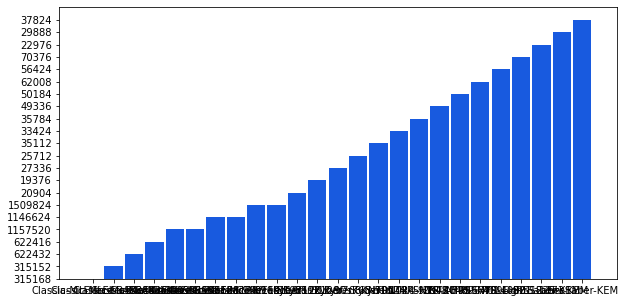

In [74]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df["KEM_name"], df["decaps"], color ='#185ADF',
        width = 0.9)

<BarContainer object of 25 artists>

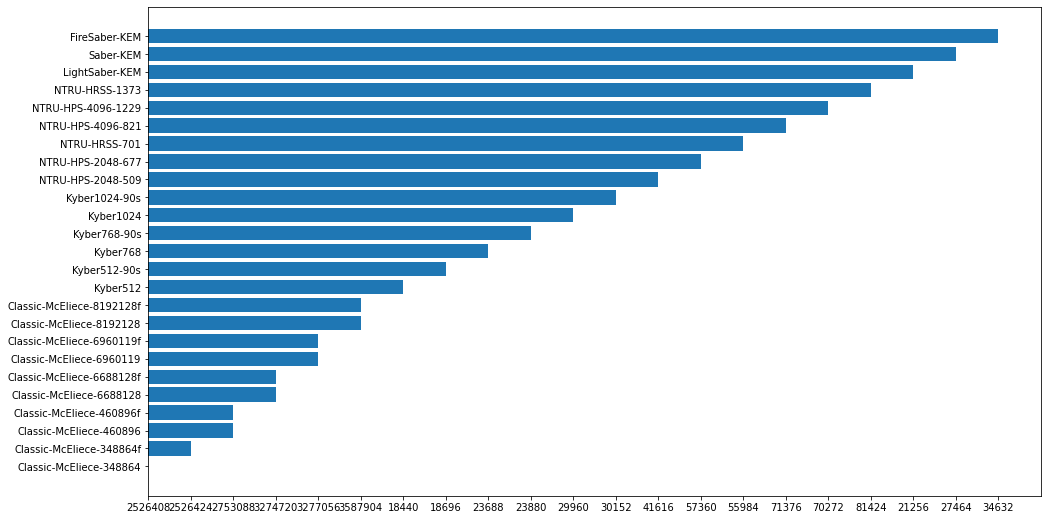

In [75]:
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(df["KEM_name"], df["keygen"])